In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
digits = load_digits()

X = digits.data      # flattened images (64 features)
y = digits.target    # labels (0–9)

print("Dataset shape:", X.shape)


Dataset shape: (1797, 64)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)
baseline_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy without PCA:", baseline_accuracy)


Accuracy without PCA: 0.9722222222222222


In [6]:
components = [2, 10, 30, 50]
pca_accuracies = []

for n in components:
    pca = PCA(n_components=n)

    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    lr_pca = LogisticRegression(max_iter=1000)
    lr_pca.fit(X_train_pca, y_train)

    y_pred_pca = lr_pca.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred_pca)

    pca_accuracies.append(acc)

    print(f"Accuracy with PCA ({n} components): {acc}")


Accuracy with PCA (2 components): 0.5166666666666667
Accuracy with PCA (10 components): 0.8861111111111111
Accuracy with PCA (30 components): 0.9611111111111111
Accuracy with PCA (50 components): 0.9722222222222222


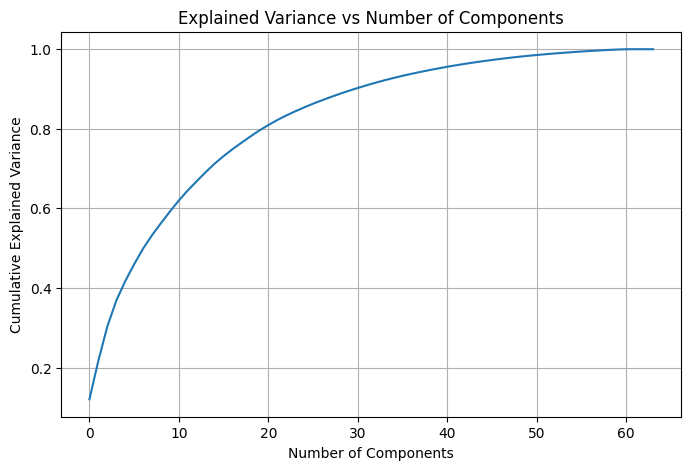

In [7]:
pca_full = PCA()
pca_full.fit(X_train_scaled)

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Number of Components")
plt.grid(True)
plt.show()


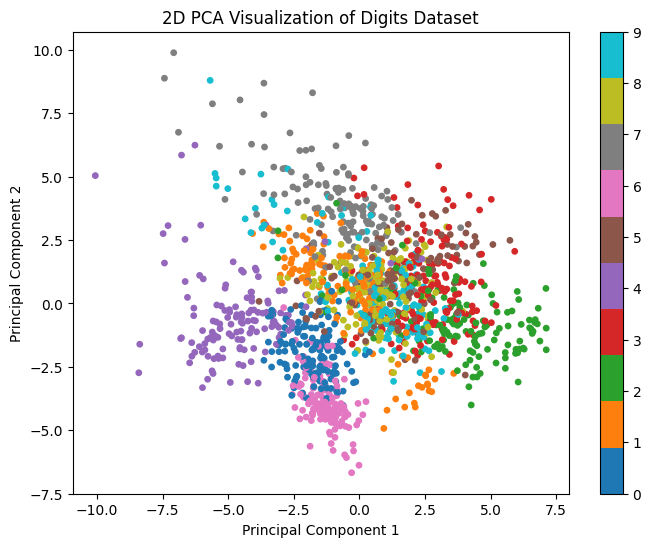

In [8]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_pca_2d[:,0],
    X_pca_2d[:,1],
    c=y_train,
    cmap='tab10',
    s=15
)
plt.colorbar(scatter)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Visualization of Digits Dataset")
plt.show()


In [9]:
print("Accuracy Comparison")
print("-------------------")
print("Without PCA:", baseline_accuracy)

for i, n in enumerate(components):
    print(f"With PCA ({n} components):", pca_accuracies[i])


Accuracy Comparison
-------------------
Without PCA: 0.9722222222222222
With PCA (2 components): 0.5166666666666667
With PCA (10 components): 0.8861111111111111
With PCA (30 components): 0.9611111111111111
With PCA (50 components): 0.9722222222222222
